<a href="https://colab.research.google.com/github/filladani/PCVK_2024/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

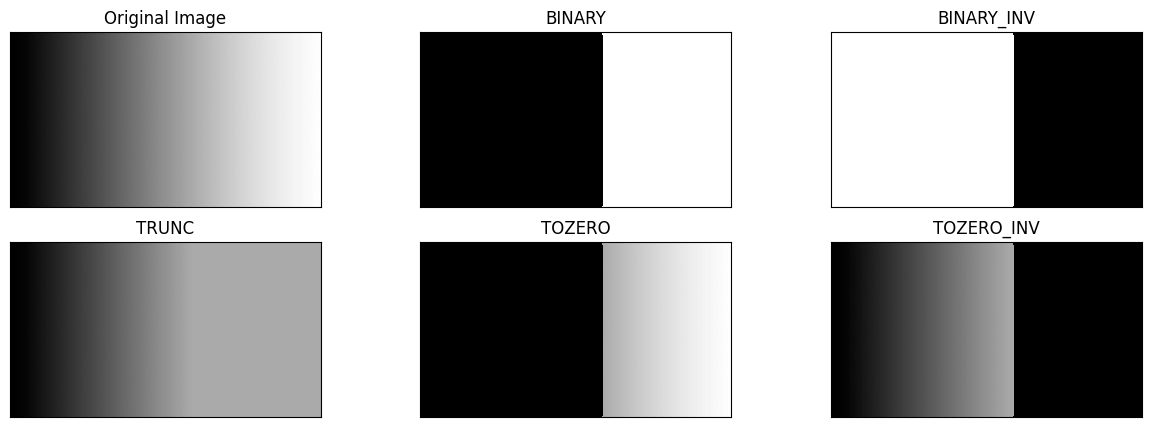

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/images/gradient.jpg')
img = cv.imread(filename)
thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 170
#nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] =255
#tanpa library
thresh1[img<=thresh] = 0
#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1
#3. Threshold Truncate
thresh3[img>thresh] = thresh
#tanpa library
#4. Threshold Tozero
thresh4[img<=thresh] = 0 #tanpa library
#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0 #tanpa library
titles = ['Original Image','BINARY','BINARY_INV','TRUNC',
'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

<ipython-input-5-0b41488cfec4>:16: RuntimeWarning: invalid value encountered in divide
  mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)


186


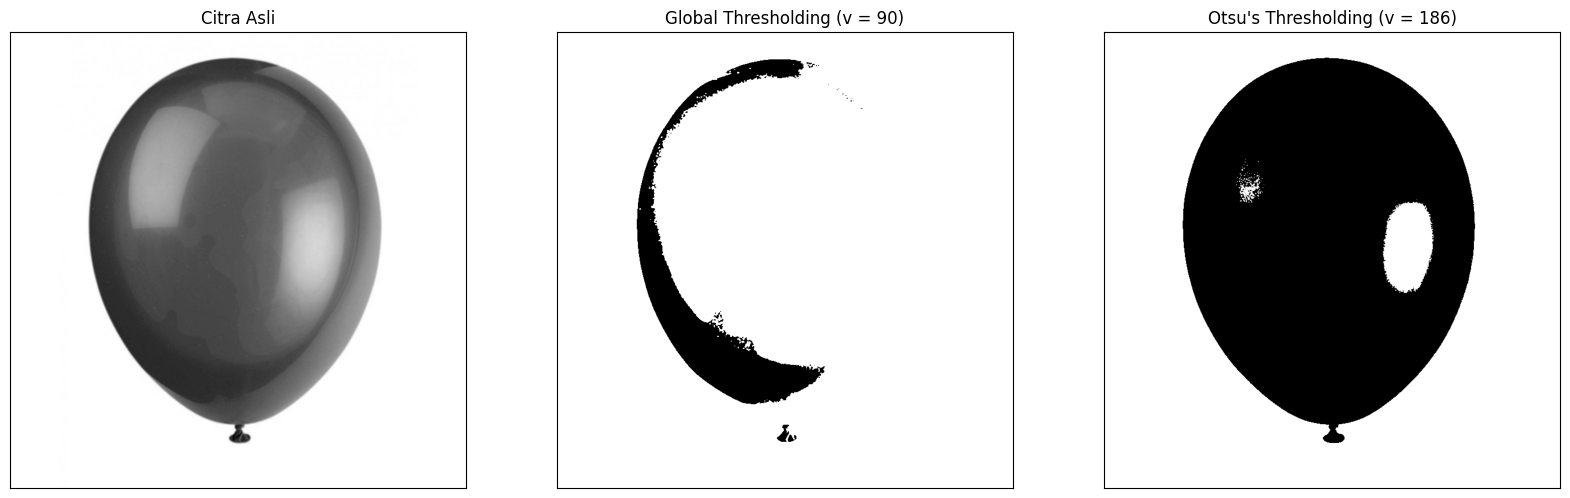

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/images/balloon.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
def otsu(gray):
  pixel_number = gray.shape[0] * gray.shape[1]
  mean_weight = 1.0/pixel_number
  his, bins = np.histogram(gray, np.arange(0,257))
  final_thresh = -1
  final_value = -1
  intensity_arr = np.arange(256)
  for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
    pcb = np.sum(his[:t])
    pcf = np.sum(his[t:])
    Wb = pcb * mean_weight
    Wf = pcf * mean_weight
    mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
    muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
    #print mub, muf
    value = Wb * Wf * (mub - muf) ** 2
    if value > final_value:
      final_thresh = t
      final_value = value
  final_img = gray.copy()
  print(final_thresh)
  final_img[gray > final_thresh] = 255
  final_img[gray < final_thresh] = 0
  return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = ("Otsu's Thresholding (v = ")+str(otsu_thresh)+")"
ret,th1 = cv.threshold(blur,90,255,cv.THRESH_BINARY)
#ret,th2 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]
plt.figure(figsize = (20,15))
for i in range(len(citra3)):
  plt.subplot(1,3,i+1),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

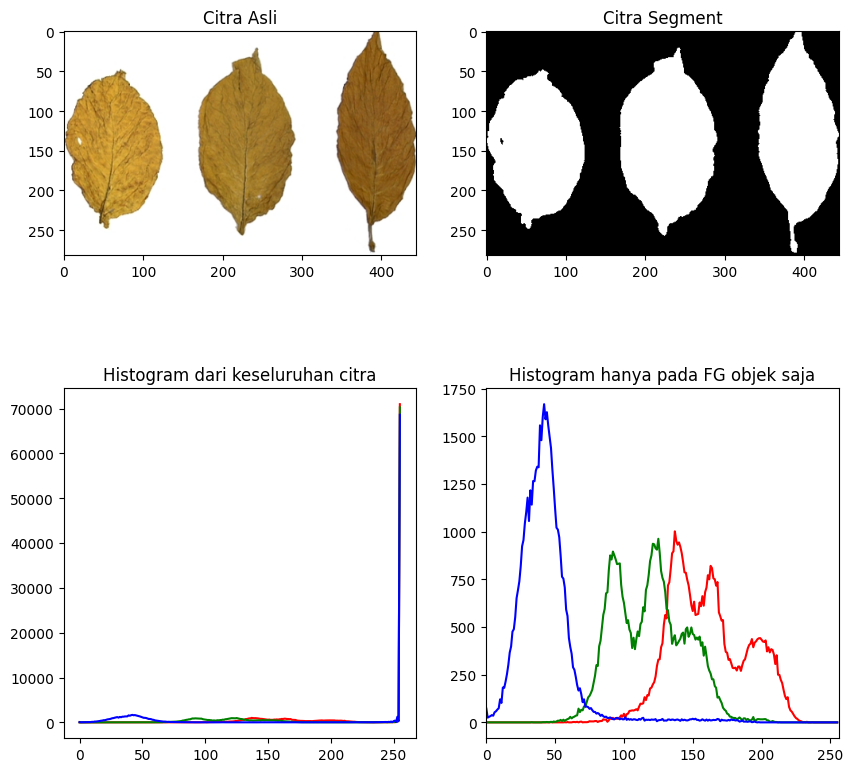

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/images/tobacco.jpg')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
  hist0 = cv.calcHist([img],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])
plt.show()

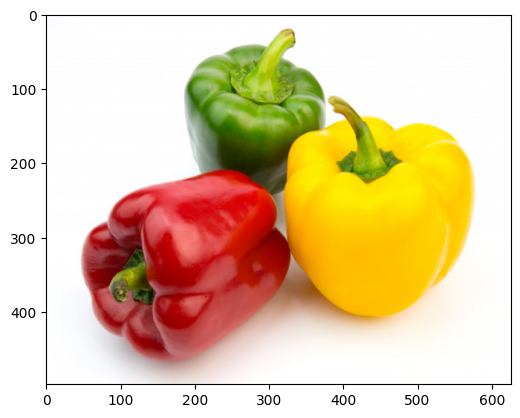

In [ ]:
img_pepper = cv.imread('/content/drive/MyDrive/PCVK/images/peppers.jpg')
img_pepper = cv.cvtColor(img_pepper,cv.COLOR_BGR2RGB)
plt.imshow(img_pepper)

In [ ]:
from sklearn.cluster import KMeans
#reshape array ke bentuk 2D
pixel_values = img_pepper.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img_pepper.shape)

In [ ]:
masked_image = np.copy(img_pepper)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
masked_image[labels == 4] = [255,255,255]
masked_image[labels == 2] = [255,255,255]
masked_image[labels == 3] = [255,255,255]
masked_image[labels == 1] = [255,255,255]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img_pepper.shape)

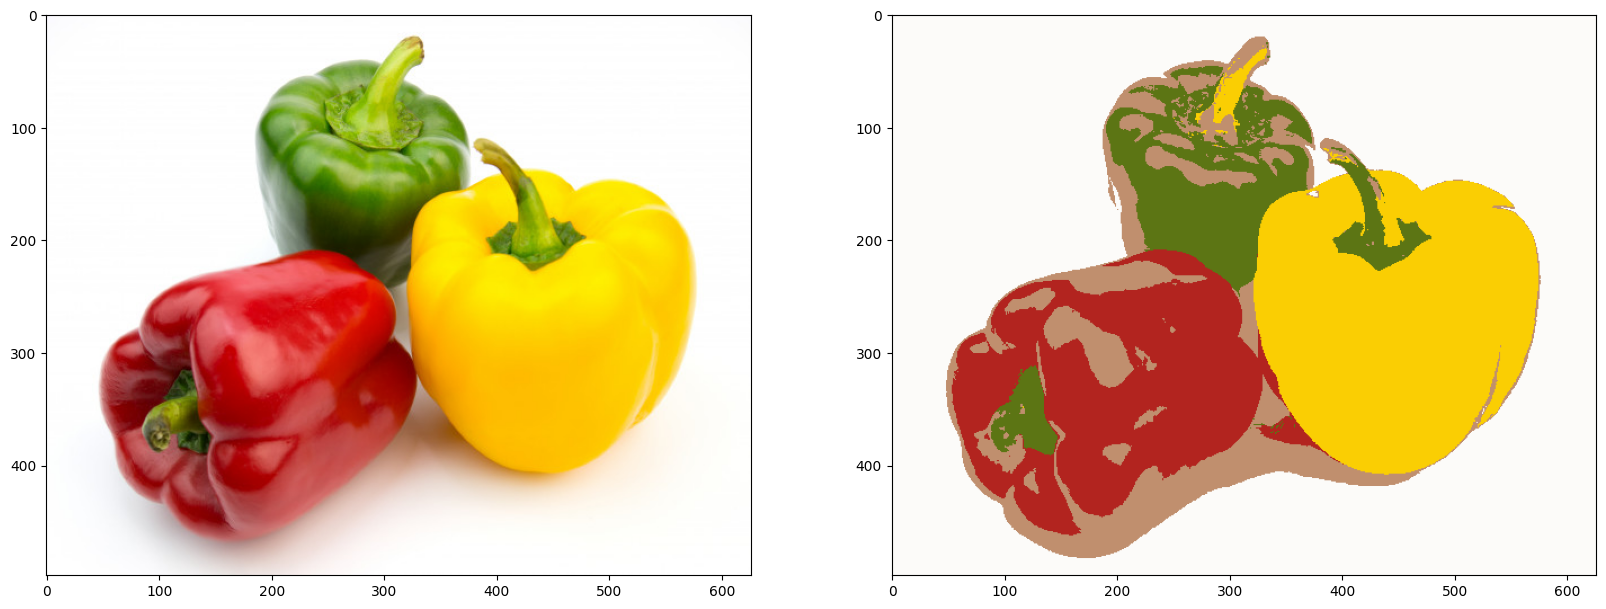

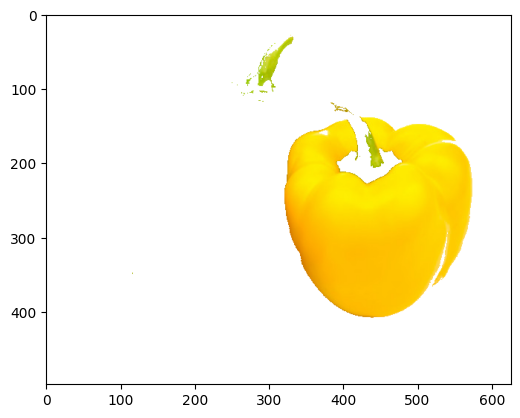

In [ ]:
plt.figure(figsize = (20,12))
plt.subplot(1,2,1),plt.imshow(img_pepper)
plt.subplot(1,2,2),plt.imshow(segmented_image)
plt.show()
plt.imshow(masked_image)

Kendala yang dihadapi adalah susah untuk menentukan cluster yang tepat.

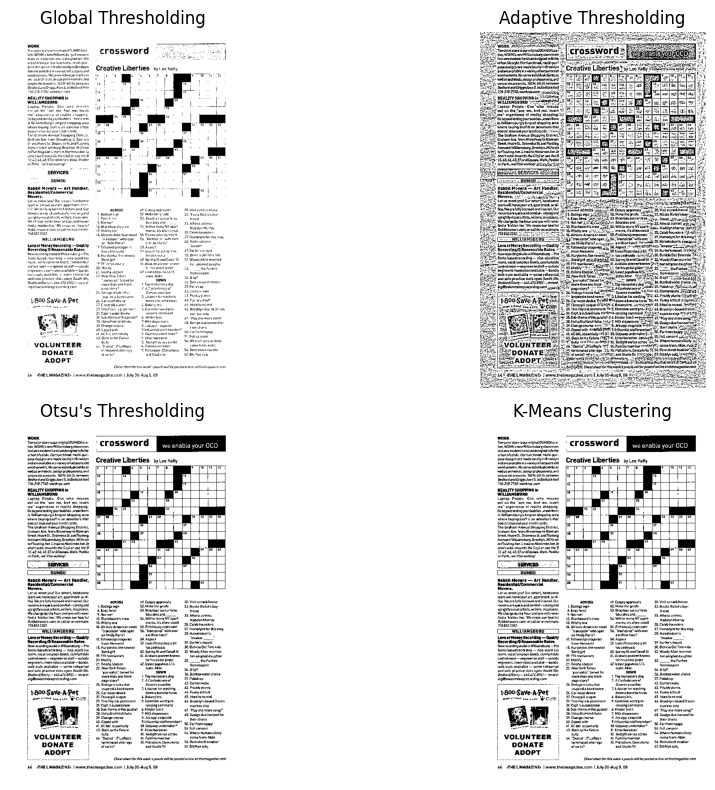

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image and convert to grayscale
image_path = '/content/drive/MyDrive/PCVK/images/crossword.jpg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Global Thresholding
_, global_thresh = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Otsu's Thresholding
_, otsu_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# K-Means Clustering
# Reshape the image to a 2D array of pixels and 1 color channel
pixel_values = gray_image.reshape((-1, 1))
pixel_values = np.float32(pixel_values)

# Define criteria and apply k-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2  # Number of clusters (binary)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to uint8, and create the segmented image
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
kmeans_thresh = segmented_image.reshape(gray_image.shape)

# Plot all results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("Global Thresholding")
plt.imshow(global_thresh, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Adaptive Thresholding")
plt.imshow(adaptive_thresh, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Otsu's Thresholding")
plt.imshow(otsu_thresh, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("K-Means Clustering")
plt.imshow(kmeans_thresh, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()